In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:
df = pd.read_csv("heart.csv")

Columns in the dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Class distribution BEFORE balancing:
target
1    526
0    499
Name: count, dtype: int64

Class distribution AFTER SMOTE oversampling:
target
0    526
1    526
Name: count, dtype: int64

Class distribution AFTER Random Undersampling:
target
0    499
1    499
Name: count, dtype: int64


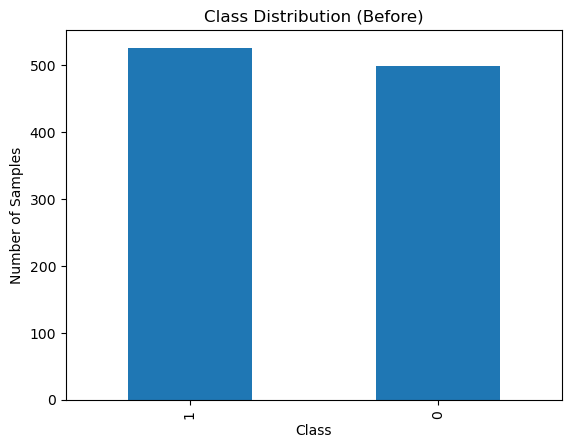

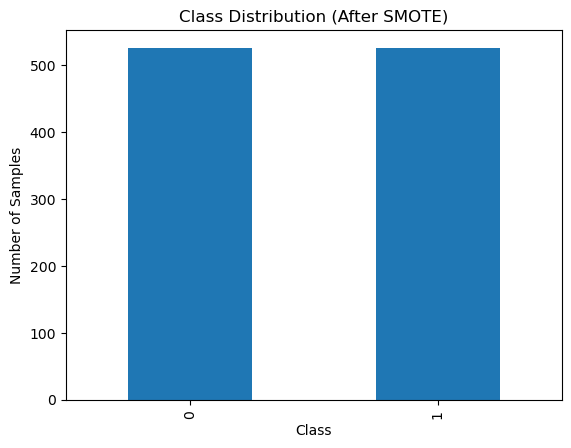

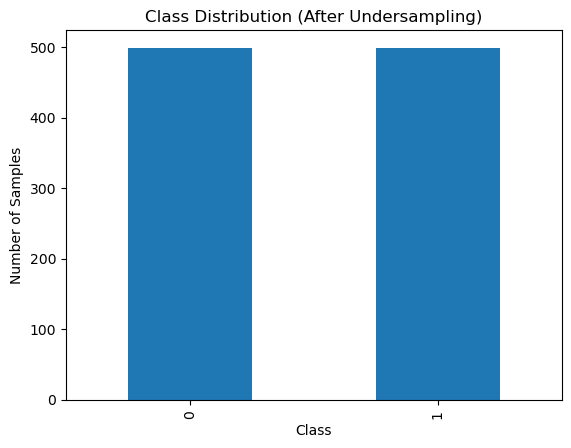

In [143]:
# ===================================
# STEP 1: LOAD DATA AND CHECK TARGET
# ===================================

# Load the dataset
df = pd.read_csv("heart.csv")   # Change file name if needed

# Show all column names (to find your target column)
print("Columns in the dataset:")
print(df.columns)

# Check how many samples are in each class (assuming the target column is 'target')
print("\nClass distribution BEFORE balancing:")
print(df['target'].value_counts())

# ===================================
# STEP 2: BALANCE DATA WITH SMOTE
# ===================================

from imblearn.over_sampling import SMOTE

# Separate features (X) and target labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Create SMOTE object
smote = SMOTE(random_state=42)

# Fit SMOTE and resample the dataset
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Show the new class distribution after SMOTE
print("\nClass distribution AFTER SMOTE oversampling:")
print(pd.Series(y_resampled_smote).value_counts())

# ===================================
# STEP 3: BALANCE DATA WITH UNDERSAMPLING
# ===================================

from imblearn.under_sampling import RandomUnderSampler

# Create undersampling object
undersample = RandomUnderSampler(random_state=42)

# Fit undersampler and resample the dataset
X_resampled_under, y_resampled_under = undersample.fit_resample(X, y)

# Show the new class distribution after undersampling
print("\nClass distribution AFTER Random Undersampling:")
print(pd.Series(y_resampled_under).value_counts())

# ===================================
# STEP 4: VISUALIZE CLASS DISTRIBUTION
# ===================================

import matplotlib.pyplot as plt

# --- Before balancing ---
df['target'].value_counts().plot(kind='bar', title='Class Distribution (Before)')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

# --- After SMOTE ---
pd.Series(y_resampled_smote).value_counts().plot(kind='bar', title='Class Distribution (After SMOTE)')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

# --- After Undersampling ---
pd.Series(y_resampled_under).value_counts().plot(kind='bar', title='Class Distribution (After Undersampling)')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()





Original dataset shape: (1025, 14)
Encoded dataset shape : (1025, 23)


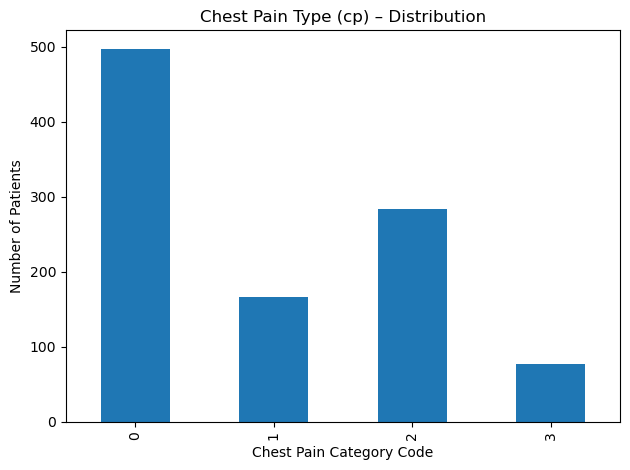

✅ Encoded dataset saved as 'heart_encoded.csv'
✅ Encoded dataset saved to: results\outputs\heart_encoded.csv


In [145]:
# --- Encoding Categorical Variables (Amarakeerthi H.K.K.U / IT24104102) ---
# Heart Disease Prediction Model - Data Preprocessing

# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 2. Load dataset (adjust path if needed)
df = pd.read_csv("heart.csv")

# 3. Identify categorical columns
# Binary features (already 0/1): keep as they are
binary_like = ["sex", "fbs", "exang"]

# Multi-category integer-coded features: need one-hot encoding
multi_cat_like = ["cp", "restecg", "slope", "ca", "thal"]

# 4. Apply one-hot encoding to multi-category features
# Ensure dummy variables are strictly 0/1 integers
df_encoded = pd.get_dummies(
    df,
    columns=multi_cat_like,
    drop_first=True,
    dtype=int    # <--- force 1/0 instead of True/False
)

# Reorder columns so 'target' (label: heart disease yes/no) is at the end
cols = [c for c in df_encoded.columns if c != "target"] + (["target"] if "target" in df_encoded.columns else [])
df_encoded = df_encoded[cols]

print("Original dataset shape:", df.shape)
print("Encoded dataset shape :", df_encoded.shape)

# 5. EDA Visualization: Distribution of chest pain types (cp)
ax = df["cp"].value_counts().sort_index().plot(kind="bar")
plt.title("Chest Pain Type (cp) – Distribution")
plt.xlabel("Chest Pain Category Code")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

# 6. Save the encoded dataset (for model training later)
output_dir = Path("results/outputs")
output_dir.mkdir(parents=True, exist_ok=True)
encoded_path = output_dir / "heart_encoded.csv"
df_encoded.to_csv(encoded_path, index=False)
df_encoded.to_csv('heart_encoded.csv', index=False)
print("✅ Encoded dataset saved as 'heart_encoded.csv'")

print(f"✅ Encoded dataset saved to: {encoded_path}")

Rows removed: 61
Rows remaining: 964


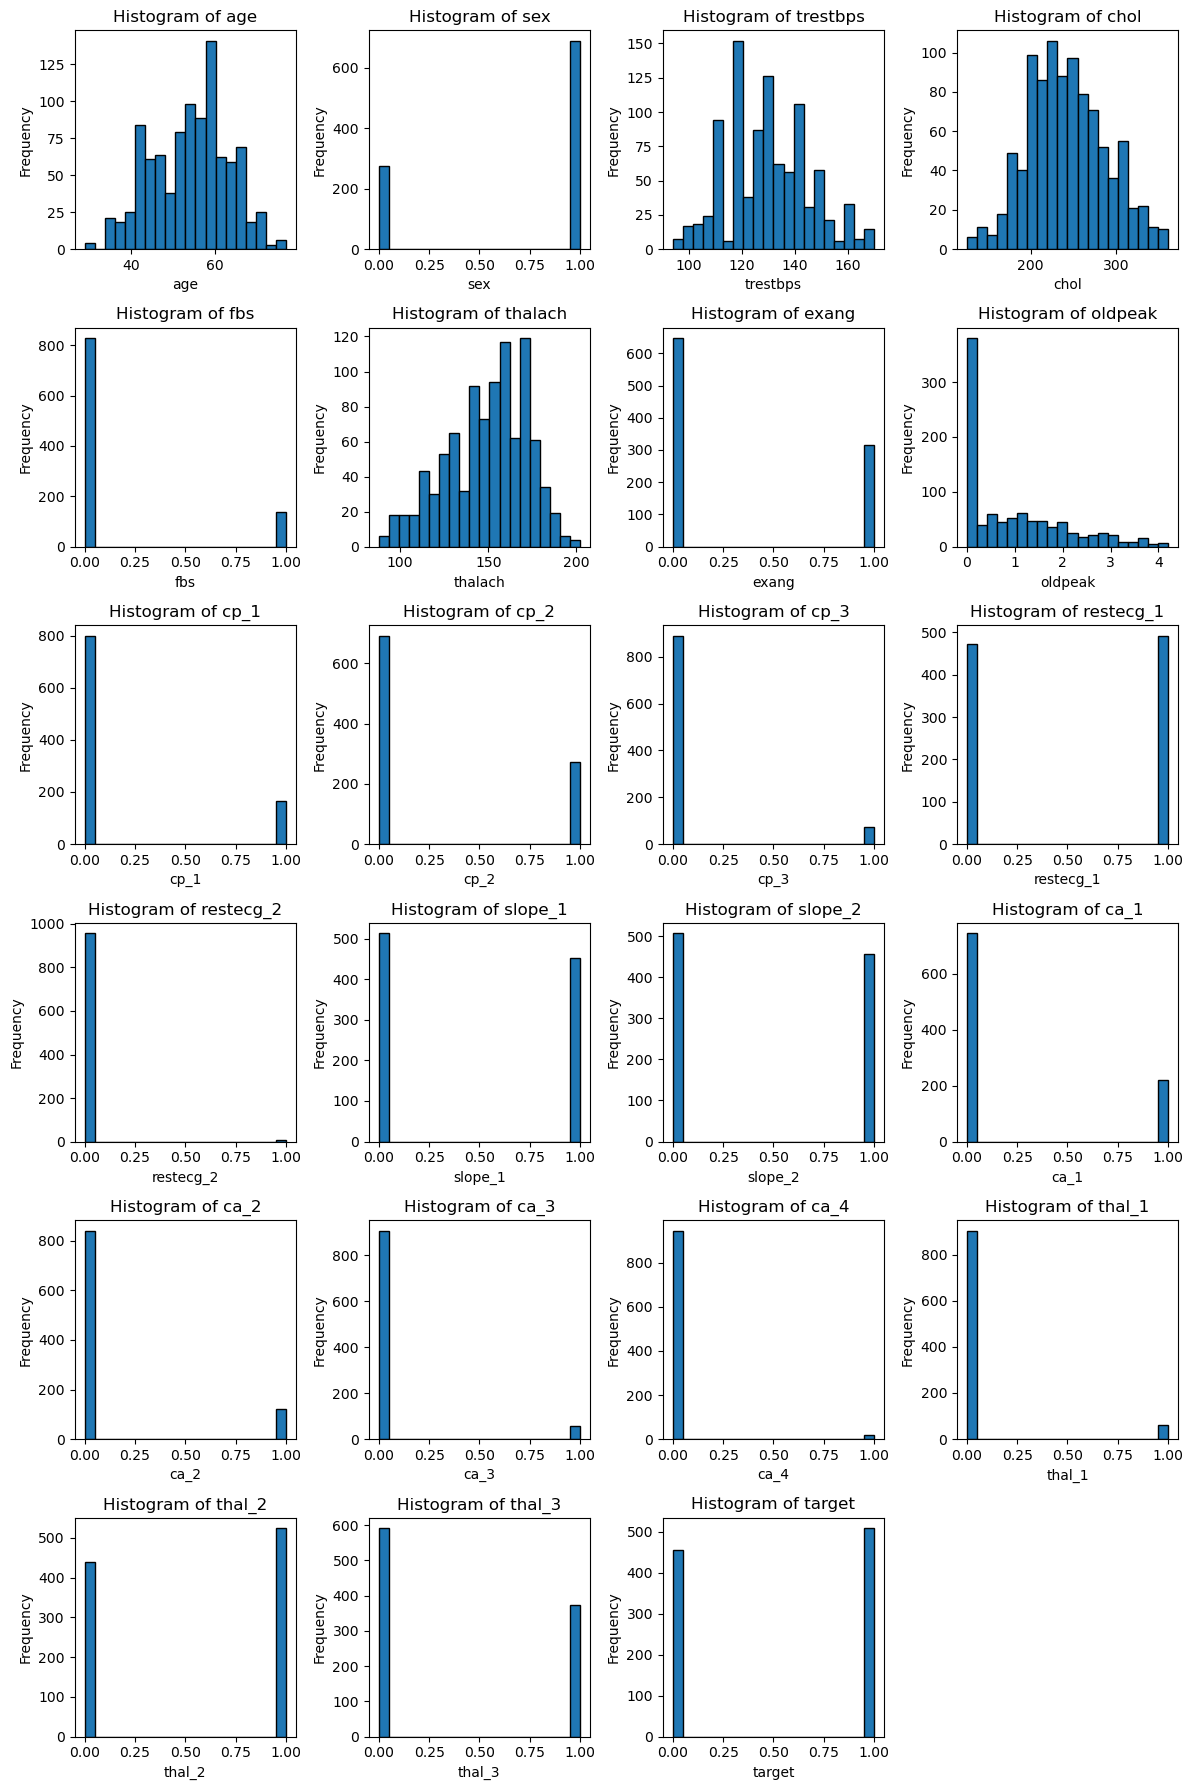

In [147]:
df = pd.read_csv("heart_encoded.csv")

# Function to remove outliers using IQR
def remove_outliers(df):
    original_rows = df.shape[0]  # Store the original number of rows
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    for col in numerical_columns:
        # Skip binary columns (those with only 2 unique values)
        if df[col].nunique() == 2:
            continue
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Show the number of rows removed
    removed_rows = original_rows - df.shape[0]
    print(f"Rows removed: {removed_rows}")
    print(f"Rows remaining: {df.shape[0]}")
    
    return df

# Remove outliers
cleaned_data = remove_outliers(df)

# Function to plot histograms for all numerical columns (including binary)
def plot_histograms(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    # Create subplots
    num_columns = len(numerical_columns)
    rows = (num_columns // 4) + (num_columns % 4 > 0)  # Calculate number of rows needed
    plt.figure(figsize=(12, 3 * rows))
    
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(rows, 4, i)  # Adjust the number of rows and columns as needed
        plt.hist(df[col], bins=20, edgecolor='black')
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Plot histograms for the cleaned dataset
plot_histograms(cleaned_data)


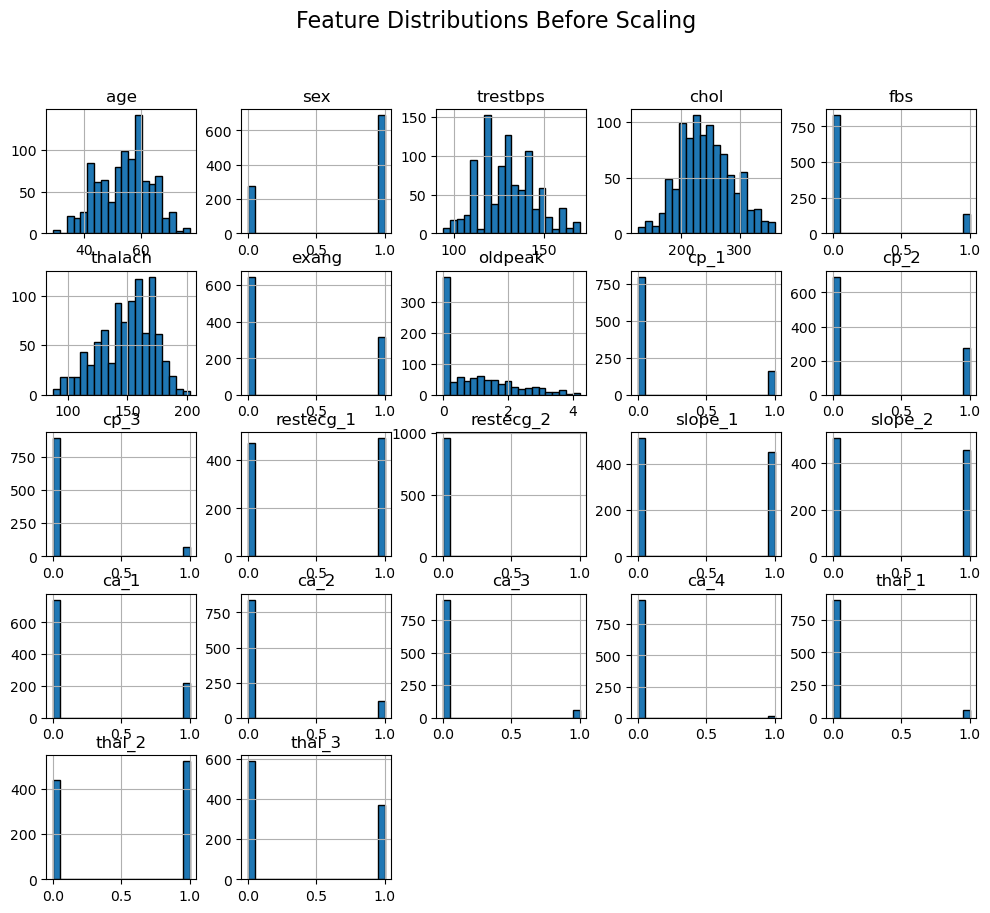

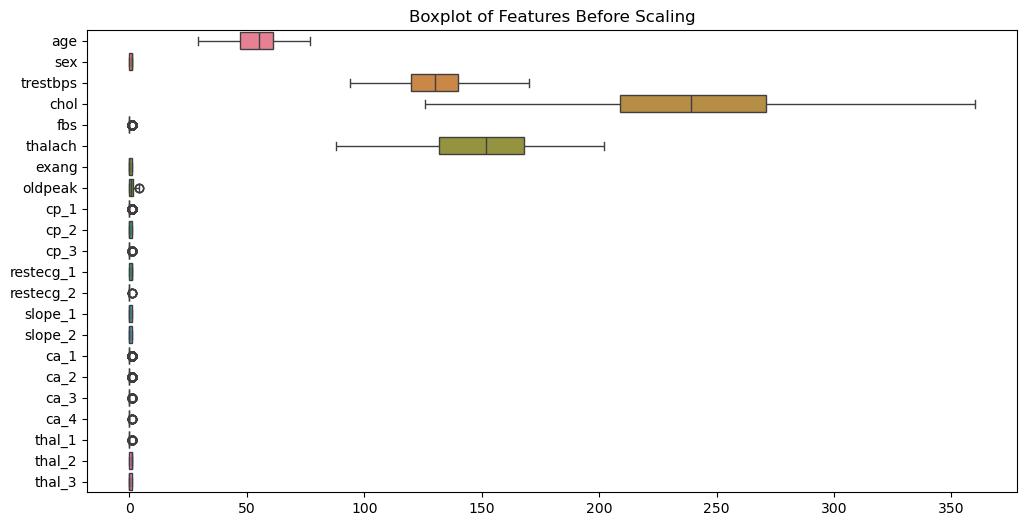

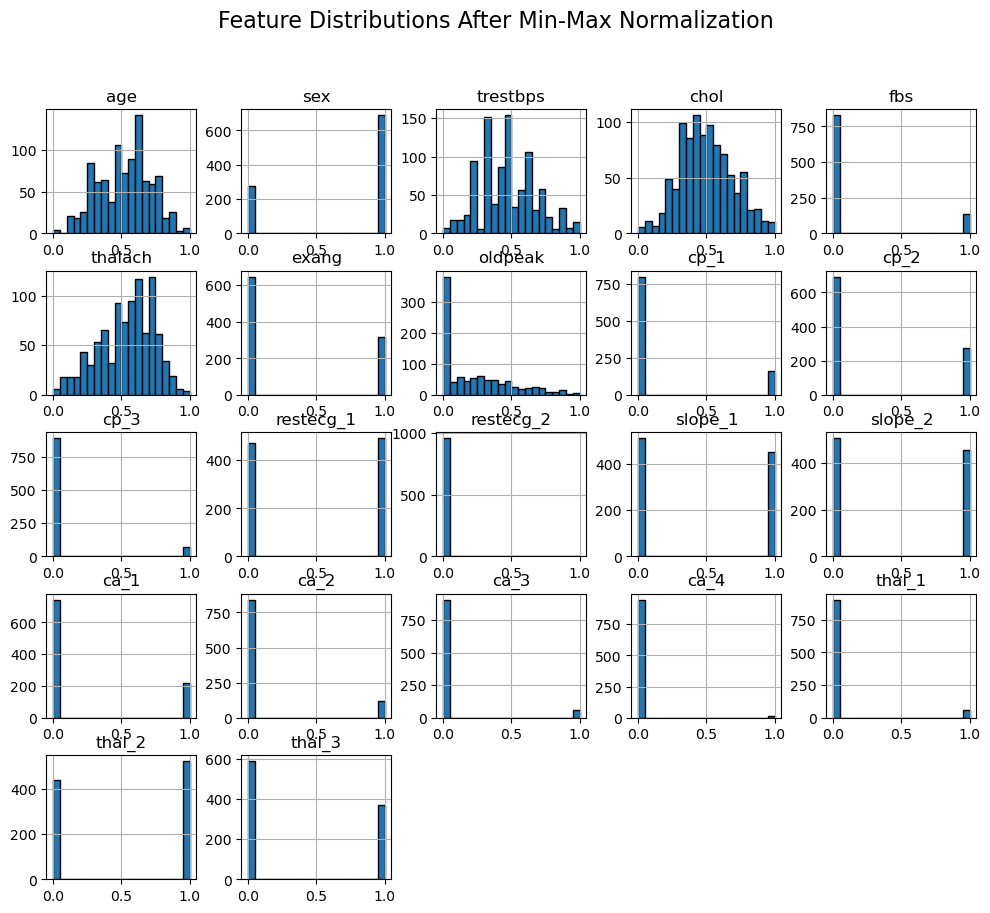

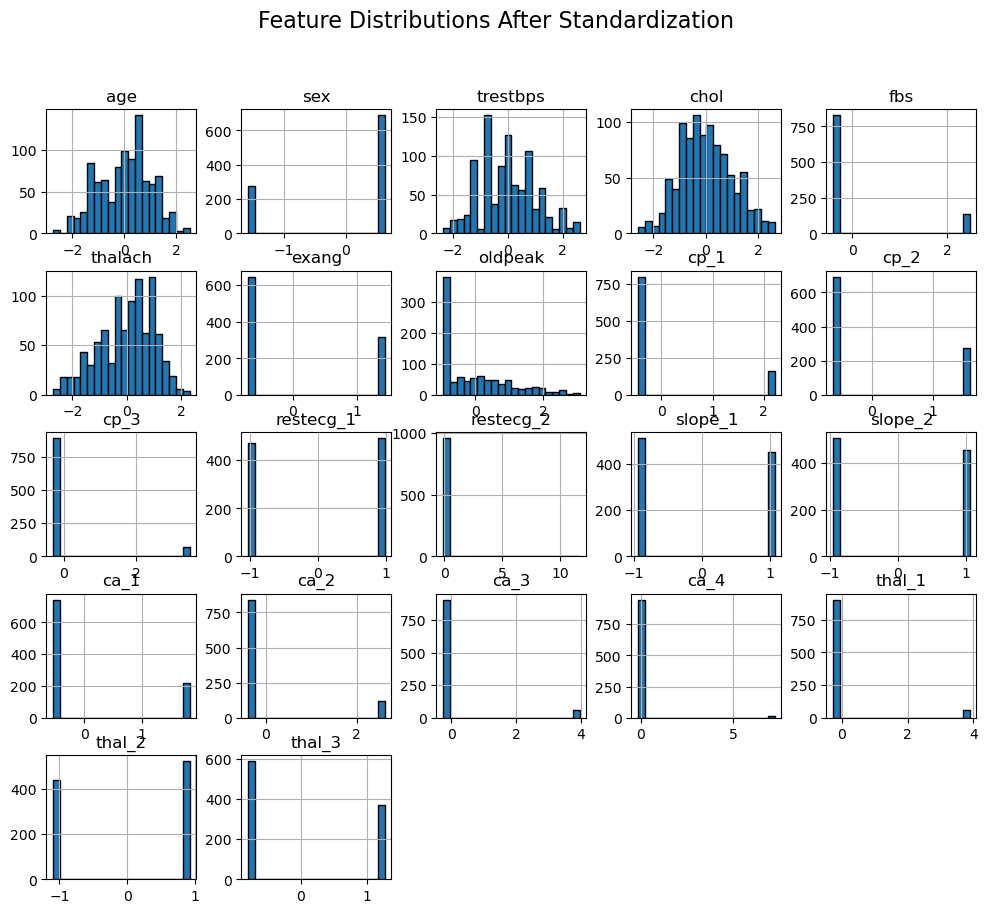

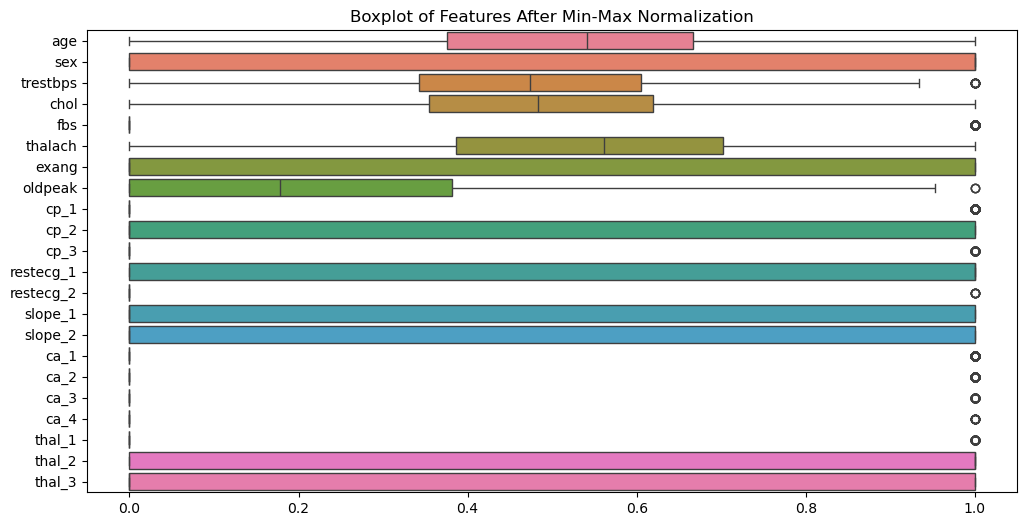

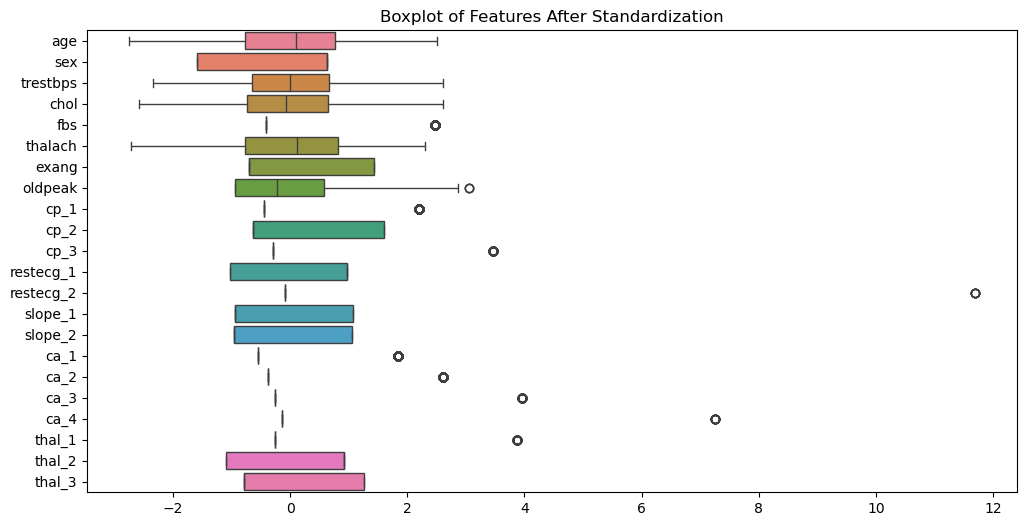

Original Data (first 5 rows):
   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  cp_1  cp_2  ...  \
0   52    1       125   212    0      168      0      1.0     0     0  ...   
1   53    1       140   203    1      155      1      3.1     0     0  ...   
2   70    1       145   174    0      125      1      2.6     0     0  ...   
3   61    1       148   203    0      161      0      0.0     0     0  ...   
4   62    0       138   294    1      106      0      1.9     0     0  ...   

   restecg_2  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  thal_3  
0          0        0        1     0     1     0     0       0       0       1  
1          0        0        0     0     0     0     0       0       0       1  
2          0        0        0     0     0     0     0       0       0       1  
3          0        0        1     1     0     0     0       0       0       1  
4          0        1        0     0     0     1     0       0       1       0  

[5 rows x 22 c

In [151]:
# --- Import libraries ---

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- Load dataset ---
df = cleaned_data

# Separate features and target
X = df.drop("target", axis=1) 
y = df["target"]              
# -------------------------
# 1. EDA Visualization (Before Scaling)
# -------------------------

# Histogram before scaling
X.hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions Before Scaling", fontsize=16)
plt.show()

# Boxplot before scaling
plt.figure(figsize=(12,6))
sns.boxplot(data=X, orient="h")
plt.title("Boxplot of Features Before Scaling")
plt.show()
# 2. Normalization (Min-Max Scaling: 0–1 range)
# -------------------------
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# -------------------------
# 3. Standardization (Z-score Scaling: mean=0, std=1)
# -------------------------
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# -------------------------
# 4. EDA Visualization (After Scaling)
# -------------------------

# Histogram after Min-Max Scaling
X_normalized_df.hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions After Min-Max Normalization", fontsize=16)
plt.show()

# Histogram after Standardization
X_standardized_df.hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions After Standardization", fontsize=16)
plt.show()

# Boxplot after Min-Max Scaling
plt.figure(figsize=(12,6))
sns.boxplot(data=X_normalized_df, orient="h")
plt.title("Boxplot of Features After Min-Max Normalization")
plt.show()

# Boxplot after Standardization
plt.figure(figsize=(12,6))
sns.boxplot(data=X_standardized_df, orient="h")
plt.title("Boxplot of Features After Standardization")
plt.show()

# -------------------------
# 5. Interpretation (Print few rows for comparison)
# -------------------------
print("Original Data (first 5 rows):")
print(X.head())

print("\nAfter Min-Max Normalization (0-1 range):")
print(X_normalized_df.head())

print("\nAfter Standardization (mean=0, std=1):")
print(X_standardized_df.head())

df.to_csv('heart_with_standardized.csv', index=False)

Blood Pressure Category Distribution:
blood_pressure_category
High        518
Elevated    252
Normal      194
Name: count, dtype: int64

Category Mapping:
Normal: 0
Elevated: 1
High: 2


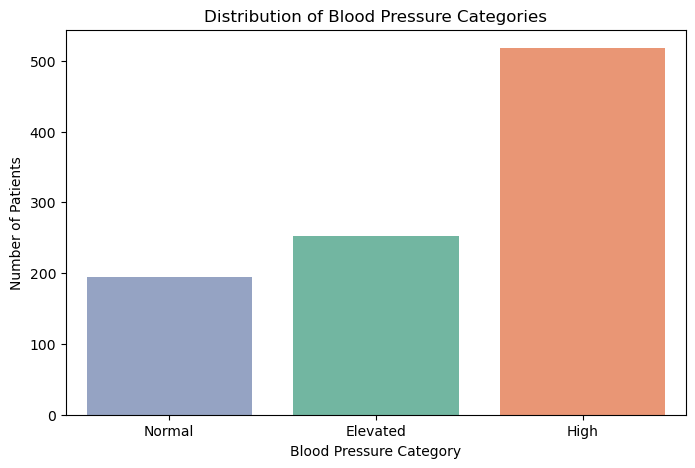


Correlation with heart disease: -0.049

Feature engineering completed! File saved as 'heart_with_bp_feature.csv'


In [153]:
# Feature Engineering by [Your Name] - IT20250001
# Creating Blood Pressure Category Feature




# 2. Load data
df = pd.read_csv('heart_with_standardized.csv')

# 3. Create blood pressure categories
def categorize_bp(trestbps):
    if trestbps < 120:
        return 'Normal'
    elif 120 <= trestbps <= 129:
        return 'Elevated'
    else:
        return 'High'

df['blood_pressure_category'] = df['trestbps'].apply(categorize_bp)

# 4. Encode categories with proper risk order
bp_mapping = {'Normal': 0, 'Elevated': 1, 'High': 2}
df['blood_pressure_category_encoded'] = df['blood_pressure_category'].map(bp_mapping)

# 5. Display results
print("Blood Pressure Category Distribution:")
print(df['blood_pressure_category'].value_counts())

print("\nCategory Mapping:")
for category, number in bp_mapping.items():
    print(f"{category}: {number}")

# 6. EDA Visualization 1: Distribution plot
plt.figure(figsize=(8, 5))
sns.countplot(x='blood_pressure_category', data=df, order=['Normal', 'Elevated', 'High'], palette='Set2', hue='blood_pressure_category', legend=False)
plt.title('Distribution of Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Number of Patients')
plt.show()



# 8. Statistical analysis
correlation = df['blood_pressure_category_encoded'].corr(df['target'])
print(f"\nCorrelation with heart disease: {correlation:.3f}")

# 9. Save the processed data
df.to_csv('heart_with_bp_feature.csv', index=False)
print("\nFeature engineering completed! File saved as 'heart_with_bp_feature.csv'")

(881, 16)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   58    0   0       100   248    0        0      122      0      1.0      1   

   ca  thal  target blood_pressure_category  blood_pressure_category_encoded  
0   2     3       0                Elevated                                1  
1   0     3       0                    High                                2  
2   0     3       0                    High                                2  
3   1     3       0                    High                                2  
4   0     2       1                  Normal                                0  
Original features: 15
Remaini

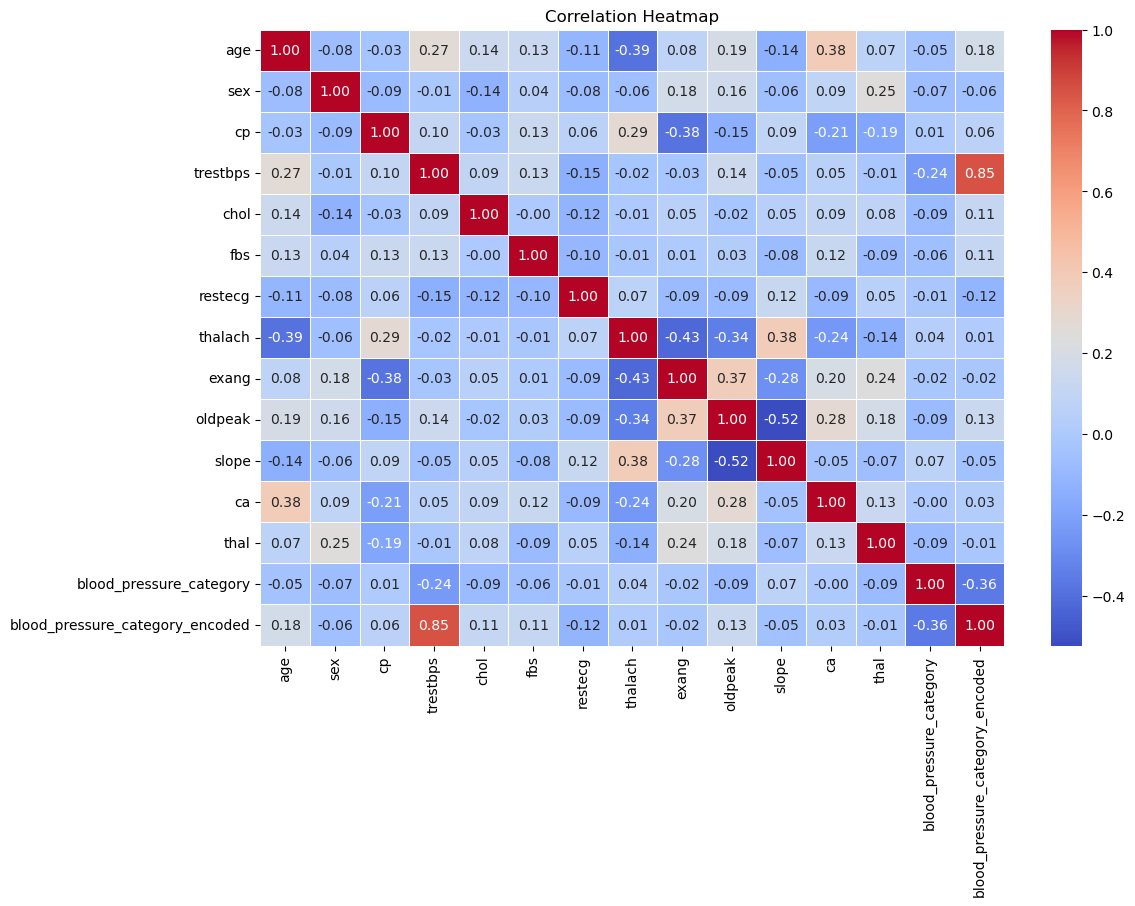

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("heart_with_bp_feature.csv")

# Print shape and first few rows of the dataframe
print(df.shape)
print(df.head())

# Separate features and target
X = df.drop(columns=['target'])   # Drop the target column
y = df['target']  # Target column

# Handle categorical columns (e.g., 'blood_pressure_category') by encoding them
categorical_columns = X.select_dtypes(include=['object']).columns

# Use LabelEncoder for categorical columns
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Apply Variance Threshold (remove features with low variance)
selector = VarianceThreshold(threshold=0.0)   # start with 0, can increase to 0.01
X_reduced = selector.fit_transform(X)

# Get selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Output the results
print("Original features:", X.shape[1])
print("Remaining features:", X_reduced.shape[1])
print("Selected Features:", list(selected_features))

# 1. Calculate the correlation matrix
corr_matrix = X.corr()

# 2. Plot the heatmap
plt.figure(figsize=(12, 8))  # Size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
